In [2]:
pip install fastai==1.0.61

Note: you may need to restart the kernel to use updated packages.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.metrics import Precision
from fastai.metrics import Recall
from fastai.metrics import FBeta





In [4]:
from fastai.vision.data import ImageDataBunch

In [5]:
from pathlib import Path
import numpy as np

In [6]:
bs = 64   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [7]:
path=Path('Candle Data')
path_save=Path('CandleDataProcessed')

In [8]:
path.ls()

[WindowsPath('Candle Data/.ipynb_checkpoints'),
 WindowsPath('Candle Data/Down'),
 WindowsPath('Candle Data/models'),
 WindowsPath('Candle Data/Up')]

flip_vert: requires do_flip=True. If True, the image can be flipped vertically or rotated by 90 degrees, otherwise only an horizontal flip is applied.

max_rotate: if not None, a random rotation between -max_rotate and max_rotate degrees is applied with probability p_affine

max_zoom: if not 1. or less, a random zoom between 1. and max_zoom is applied with probability p_affine

max_lighting: if not None, a random lightning and contrast change controlled by max_lighting is applied with probability p_lighting

max_warp: if not None, a random symmetric warp of magnitude between -max_warp and maw_warp is applied with probability p_affine

p_affine: the probability that each affine transform and symmetric warp is applied

p_lighting: the probability that each lighting transform is applied


In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), 
                                  size=224, 
                                  num_workers=4).normalize(imagenet_stats)

C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpol

C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpol

C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpol

C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\torch\nn\functional.py:3657: UserWarning: The default behavior for interpol

In [10]:
data.classes

['Down', 'Up']

In [27]:
print(data.valid_ds)
print("...")
print(data.train_ds)
print("...")

LabelList (201 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Up,Up,Up,Up,Down
Path: Candle Data
...
LabelList (808 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Down,Down,Down,Down,Down
Path: Candle Data
...


In [12]:
print(data.test_ds)

None


In [13]:
precision = Precision()
recall = Recall()
f1score = FBeta()


In [14]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, precision, recall, f1score])

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,precision,recall,f_beta,time
0,1.200574,0.877805,0.487562,0.562500,0.490909,0.503731,01:38
1,1.227748,1.081724,0.457711,0.591837,0.527273,0.539033,01:40
2,1.113888,0.933739,0.437811,0.590164,0.654545,0.640569,01:35
3,1.088697,0.919510,0.432836,0.595041,0.654545,0.641711,01:39


The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data.

Goal: validation loss should be similar to but slightly higher than training loss.

If target values are categorical, the error is expressed as an error rate. This is the proportion of cases where the prediction is wrong.

In [17]:
# learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

In [18]:
# learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

In [19]:
# learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [20]:
# learn.save('Model 1')

In [ ]:
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=352, num_workers=4).normalize(imagenet_stats)

In [21]:
# learn.data=data

In [22]:
# gc.collect()

In [23]:
# learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [24]:
# learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
correcti=0
list_down=[]
list_up=[]
print("Len: ", len(data.valid_ds))


Len:  201


learn.predict()
It returns a tuple of three elements with, in reverse order,

the prediction from the model, potentially passed through the activation of the loss function (if it has one)
the decoded prediction, using the potential decodes method from it
the fully decoded prediction, using the transforms used to build the Datasets/DataLoaders


In [32]:
for i in range(len(data.valid_ds)):
    
    #print("\ndata.valid_ds[i]: ", data.valid_ds[i])
    #print("data.valid_ds[i][1]: ", data.valid_ds[i][1])
    prediction=learn.predict(data.valid_ds[i][0])
    #print("inital prediction: ", prediction)
    
    if str(data.valid_ds[i][1])=="Down" and bool(prediction[1]==0) :
        correcti=correcti+1
        if prediction[2][0] >= 0.75 :
            list_down=list_down + [i]
            print("Confidently predicted (Down): ", i)
            print()
            
    if str(data.valid_ds[i][1])=="Up" and bool(prediction[1]==1) :
        correcti=correcti+1
        if prediction[2][1] >= 0.75 :
            list_up=list_up + [i]
            print("Confidently predicted (Up): ", i)
            print()
            

Confidently predicted (Up):  1

Confidently predicted (Down):  4

Confidently predicted (Up):  5

Confidently predicted (Down):  9

Confidently predicted (Down):  11

Confidently predicted (Up):  13

Confidently predicted (Down):  14

Confidently predicted (Up):  16

Confidently predicted (Down):  18

Confidently predicted (Up):  20

Confidently predicted (Up):  21

Confidently predicted (Down):  32

Confidently predicted (Down):  33

Confidently predicted (Up):  34

Confidently predicted (Up):  36

Confidently predicted (Down):  38

Confidently predicted (Down):  39

Confidently predicted (Down):  45

Confidently predicted (Up):  47

Confidently predicted (Up):  48

Confidently predicted (Up):  53

Confidently predicted (Up):  55

Confidently predicted (Up):  60

Confidently predicted (Up):  63

Confidently predicted (Up):  65

Confidently predicted (Up):  68

Confidently predicted (Down):  70

Confidently predicted (Down):  72

Confidently predicted (Up):  75

Confidently predicted (

In [33]:
print("Validation dataset: ", len(data.valid_ds))

print("Correctly predicted: ", correcti)

print("Greater than 75% prediction confidence: ", len(list_down)+len(list_up))
len(list_down),len(list_up)

Validation dataset:  201
Correctly predicted:  114
Greater than 75% prediction confidence:  77


(24, 53)

In [34]:
test_input1 = data.valid_ds[132][0]

In [35]:
test_input2 = data.valid_ds[11][0]

# Testing the Model: User Perspective

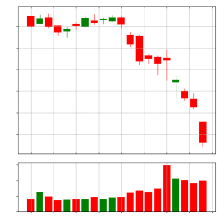

In [36]:
test_input2

In [37]:
#prediction=learn.predict(test_input1)
prediction=learn.predict(test_input2)

In [38]:
prediction

(Category tensor(0), tensor(0), tensor([0.9484, 0.0516]))

In [39]:
def application_output(prediction):
    print(prediction[2])
    if bool(prediction[1]==0):
        print("Trend Predicted: Down")
    elif bool(prediction[1]==1):
        print("Trend Predicted: Up")

In [40]:
application_output(prediction)

tensor([0.9484, 0.0516])
Trend Predicted: Down
